#Laboratorio de Contornos Activos
** Objetivo: **

Se busca distinguir el contorno del buho presente en la fotografía, utiizando la técnica de contornos activos. Se realizaron varios experimentos con diferentes técnicas. Para la técnica de contornos activos es necesario definir un contorno inicial el cual a traves del algoritmo busca adecuarse a la forma que existe dentro del contorno inicial. Por ello, en la variable init definimos un contorno inicial del cual va a partir la técnica.

# Integrantes:

* **Alexis Alvarado Román** 
* **Fernando Chica Ortiz**
* **Mario Macías Paladines**
* **Adrián Cuesta Sánchez** 
* **Jacquelin Flor Baldeón**

# Declaración de librerías

In [0]:
import numpy as np
from skimage import io, feature, filters           # Procesamiento de imagen
import matplotlib.pyplot as plt                    # Visualizaciones
from scipy import ndimage as ndi                   # Filtro de mediana
from skimage.filters import gaussian               # Filtro Gausiano
from skimage.segmentation import active_contour    # Contornos Activos
from skimage import exposure          # Modificicacion del contraste (exposure)
from skimage import morphology        # Operadores morfologicos 
from skimage.color import rgb2gray #aplanamos la imagen (Le quitamos los la capa de colores)
from skimage.feature import canny
from skimage import util 
import matplotlib.pylab as pylab

# Prepraración de Datos (Load) desde Google Drive
*Si tu ambiente es local comenta el código a continuación*

In [0]:
!pip install -q pydrive

In [0]:
from google.colab import auth
auth.authenticate_user()

from pydrive.drive import GoogleDrive
from pydrive.auth import GoogleAuth
from oauth2client.client import GoogleCredentials
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Load tema10_act1a.png - MARIPOSA
imagen01 = drive.CreateFile({'id': '1pb-ML3r4326LrsA-7YSaAaLe5lqlSIGo'})
imagen01.GetContentFile('tema10_act1a.png')

# Load tema10_act1b.png - BÚHO
imagen02 = drive.CreateFile({'id': '1DOcBy7E7eJYCDzPwnogIEcagPhvVECn5'})
imagen02.GetContentFile('tema10_act1b.png')

# Load tema10_act1c.png - CABALLO
imagen03 = drive.CreateFile({'id': '1Dl1oV6K86PA_byvgkXoJi67IEOAf4fk4'})
imagen03.GetContentFile('tema10_act1c.png')

# Visualización de las imágenes

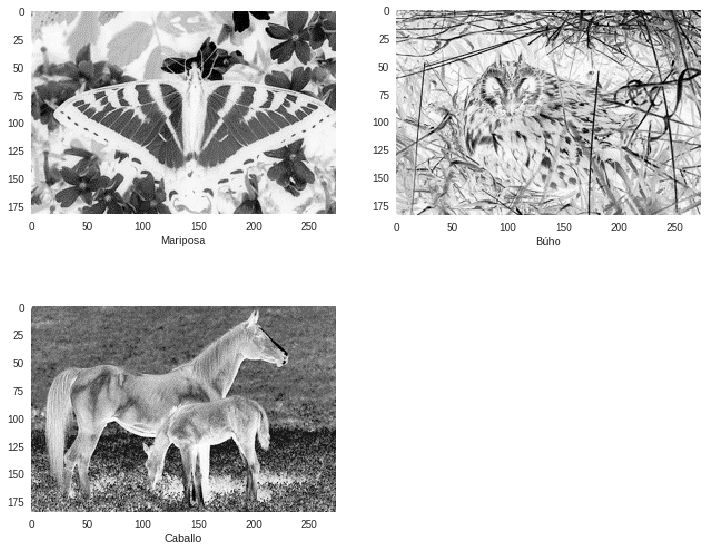

In [4]:
img1= io.imread('tema10_act1a.png') # - MARIPOSA
img2= io.imread('tema10_act1b.png') # - BÚHO
img3= io.imread('tema10_act1c.png') # - CABALLO

f, axes = plt.subplots(ncols=2,nrows=2,figsize=(12, 10))
ax1, ax2, ax3, ax4 = axes.flatten()


ax1.imshow(img1)
ax1.set_xlabel("Mariposa")
ax1.grid(False)

ax2.imshow(img2)
ax2.set_xlabel("Búho")
ax2.grid(False)

ax3.imshow(img3)
ax3.set_xlabel("Caballo")
ax3.grid(False)

ax4.imshow(img3*0)
ax4.set_xticks([]), ax4.set_yticks([])

plt.show()

# Experimentación con el búho
**Experimento 1.-**
En primera instancia se utiliza una procesado sistemático del histograma de la imagen, en este caso se realiza una ecualización del histograma buscando que el contraste de la imagen este más equilibrado, además con el objetivo de disminuir las texturas y evitar que el algoritmo de contornos activos se le dificulte identificar la forma a la cual adapartarse, se utiliza un filtro gaussiano con una mascara de 3x3. ** Resultado Exp.1 ** *No se ha obtenido un resultado optimo pues unicamente se logro adaptar el contorno incial en la parte baja del buho, lo que se busca es adaptar todo el contorno y no solamente una parte*.

**Experimento 2.-**
Se tiene un enfoque de eliminar los detalles que pueden existir en el buho por su pigmentación y en el entorno por las ramas. Para ello, se aplica un operador morfologico de erosión, seguido de uno de cierre. Lo que se busca es que los pigmentos desaparezcan al erosionar las zonas cercanas a ellos, de esta forma se podría lograr que el pigmento del buho sea diferente del entorno. **Resultado Exp.2** *No se alcanza un buen resultado pues al intentar eliminar los pigmentos del buho, este proceso también afecto al entorno causando que se vuelva más complejo identificar donde se encuentra el buho con respecto al entorno, sin embargo si nos fijamos en detalle, podemos notar que si se ha logrado delimitar al buho con respecto al entorno.*

**Experimento 3.-**
Tomando como base el experimento 1, se necesita cambiar el contraste en la imagen para poder visualizarlo mejor, por ello a continuación a partir  se realiza un ajuste en la intensidad de los pixeles y resaltar al buho del entorno. **Resultado Exp.3** *Se puede observar que al cambiar el contraste de la imagen, resulto más sencillo para el algoritmo de contornos activos identificar el contorno del buho, pues al utilizar la erosión y el cierre se pudieron eliminar en parte, detalles que hacían que el entorno y el buho sean parecidos. Causando que al cambiar el contraste, el algoritmo se adapte mejor al contorno deseado*

**Experimento 4.-** Aunque en el experimento anterior se obtuvo un mejor resultado que en los otros experimentos, aun no se ha alcanzado un resultado óptimo, por ello, en este caso se plantea el uso de operadores punto a punto con un ajuste logarítmico, seguido de un filtro guasiano para eliminar en parte los detalles pues en los otros experimentos al considerar la textura se obtuvieron mejores resultados. **Resultado Exp.4** *En este caso no se ha alcanzado un buen resultado, al utilziar un operador punto a punto no se ha logrado realzar la imagen de tal forma que el buho sobresalga con respecto al entorno.*

**Experimento 5.-**
Finalmente, considerando que se obtendrá un mejor resultado si se obtiene una imagen donde el buho sea diferente del entorno, es decir, eliminar su pigmentación que lo camufla y realzar la imagen. Se realiza un experimento final al modificar el contraste de la imagen y aplicar un filtro gaussiano. **Resultado Exp5** *Se obtiene un resultado similar al expermiento 3, aunque en este caso la forma del contorno final se adapta mejor a la forma del buho. De esta forma queda constatado que la textura (dada la pigmentación del buho) juega un papel muy importante en la segmentación de esta imagen.*

**Experimento Complementario al 5.-**
La imagen del experimento 5 se le aplicó un operador de tipo sobel horizontal, en el resultado se puede distinguir una forma del buho, sin embargo, se puede constatar lo mencionado, la textura juega un papel muy importante en la segmentación de la imagen.

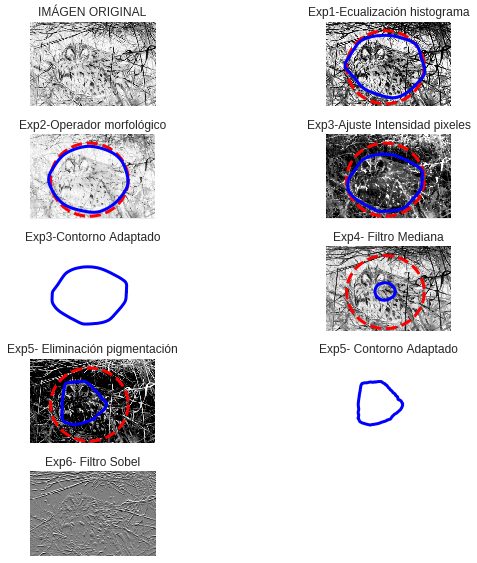

In [5]:
#####################
### EXPERIMENTO 1 ###
#Definimos el contorno incial
s = np.linspace(0, 2*np.pi, 400)
#Ecualizcion del histograma
img_buho = exposure.equalize_hist(img2) 

#   posicion + tamaño 
x = 130 + 85*np.cos(s)
y = 100 + 70*np.sin(s)

# Variable donde se almacena el controno inicial
init = np.array([x, y]).T

# Contorno activos
snake_experimento1 = active_contour(gaussian(img_buho,3),
                       init, alpha=0.1, beta=10, gamma=0.01)

#####################
### EXPERIMENTO 2 ###
# Operadores morfologicos de tipo erosion y cierre

img_mor =  morphology.closing(morphology.erosion(img2))

snake_experimento2 = active_contour(gaussian(img_mor,4),
                       init, alpha=0.01, beta=10, gamma=0.01)

#####################
### EXPERIMENTO 3 ###
# Re escalamiento de los niveles de intensidad

img_ri = (exposure.rescale_intensity(img_mor, in_range=(20, 180)))

snake_experimento3 = active_contour(img_ri,
                       init, alpha=2, beta=10, gamma=0.4)

#####################
### EXPERIMENTO 4 ###
img_mf = (ndi.median_filter(exposure.adjust_log(img2,gain=0.1),size=2))

snake_experimento4 = active_contour(gaussian(img_mf,3),
                       init, alpha=0.1, beta=10, gamma=0.01)

#####################
### EXPERIMENTO 5 ###
img_ri_experimento5 = (exposure.rescale_intensity(img2, in_range=(70, 255)))

s = np.linspace(0, 2*np.pi, 400)
x = 130 + 85*np.cos(s)
y = 100 + 80*np.sin(s)
init = np.array([x, y]).T

snake_experimento5 = active_contour(gaussian(img_ri_experimento5,4),
                       init, alpha=0.1, beta=4, gamma=0.00001)

##################################
### EXPERIMENTO COMPLEMENTARIO ###
im_sobel = filters.sobel_h(img_ri_experimento5)    # Filtro Sobel

####################
####################
### Visualizamos ###
f, axes = plt.subplots(ncols=2,nrows=5,figsize=(12, 8))
ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9 = axes.flatten()

f.subplots_adjust(hspace=0.6, wspace=0.1)


ax0.imshow(img2)
ax0.grid(False)
ax0.set_title('IMÁGEN ORIGINAL')
ax0.set_xticks([]), ax0.set_yticks([])

# PLOT BUHO EXPERIMENTO 1
ax1.imshow(img_buho)
ax1.plot(init[:, 0], init[:, 1], '--r', lw=3)
ax1.plot(snake_experimento1[:, 0], snake_experimento1[:, 1], '-b', lw=3)
ax1.set_xticks([]), ax1.set_yticks([])
ax1.axis([0, img_buho.shape[1], img_buho.shape[0], 0])
ax1.grid(False)
ax1.set_title('Exp1-Ecualización histograma')

# PLOT BUHO EXPERIMENTO 2
ax2.imshow(img_mor)
ax2.plot(init[:, 0], init[:, 1], '--r', lw=3)
ax2.plot(snake_experimento2[:, 0], snake_experimento2[:, 1], '-b', lw=3)
ax2.set_xticks([]), ax2.set_yticks([])
ax2.axis([0, img_buho.shape[1], img_buho.shape[0], 0])
ax2.grid(False)
ax2.set_title('Exp2-Operador morfológico')

# PLOT BUHO EXPERIMENTO 3
ax3.imshow(img_ri,cmap='gray')
ax3.plot(init[:, 0], init[:, 1], '--r', lw=3)
ax3.plot(snake_experimento3[:, 0], snake_experimento3[:, 1], '-b', lw=3)
ax3.set_xticks([]), ax3.set_yticks([])
ax3.axis([0, img_ri.shape[1], img_ri.shape[0], 0])
ax3.set_title('Exp3-Ajuste Intensidad pixeles')
ax3.grid(False)

ax4.imshow(img_ri*0)
ax4.plot(snake_experimento3[:, 0], snake_experimento3[:, 1], '-b', lw=3)
ax4.set_xticks([]), ax4.set_yticks([])
ax4.set_title('Exp3-Contorno Adaptado')
ax4.grid(False)

# PLOT BUHO EXPERIMENTO 4
ax5.imshow(img_mf)
ax5.plot(init[:, 0], init[:, 1], '--r', lw=3)
ax5.plot(snake_experimento4[:, 0], snake_experimento4[:, 1], '-b', lw=3)
ax5.set_xticks([]), ax5.set_yticks([])
ax5.axis([0, img_mf.shape[1], img_mf.shape[0], 0])
ax5.set_title('Exp4- Filtro Mediana')
ax5.grid(False)

# PLOT BUHO EXPERIMENTO 5
ax6.imshow(img_ri_experimento5, cmap='gray')
ax6.plot(init[:, 0], init[:, 1], '--r', lw=3)
ax6.plot(snake_experimento5[:, 0], snake_experimento5[:, 1], '-b', lw=3)
ax6.set_xticks([]), ax6.set_yticks([])
ax6.axis([0, img_ri_experimento5.shape[1], img_ri_experimento5.shape[0], 0])
ax6.grid(False)
ax6.set_title('Exp5- Eliminación pigmentación')

ax7.imshow(img_ri_experimento5*0)
ax7.plot(snake_experimento5[:, 0], snake_experimento5[:, 1], '-b', lw=3)
ax7.set_xticks([]), ax7.set_yticks([])
ax7.grid(False)
ax7.set_title('Exp5- Contorno Adaptado')

# PLOT BUHO EXPERIMENTO COMPLEME
ax8.imshow(im_sobel, cmap='gray')
ax8.grid(False)
ax8.set_title('Exp6- Filtro Sobel')
ax8.set_xticks([]), ax8.set_yticks([])

# DE RELLENO PARA COMPLETAR EL PLOT
ax9.imshow(im_sobel*0)
ax9.set_xticks([]), ax9.set_yticks([])

f.tight_layout()
f.subplots_adjust(left=0.15, top=0.95)
plt.show()

# Experimentación con la Mariposa

Necesitamos realzar los detalles de la imagen, con el fin de poder identificar mas facilmente los elementos que la componen, y resaltar el objeto en este caso la mariposa. Hagamos algunas operaciones para ver cuales nos dan mejores resultados:  

Operaciones en Escala de grises, Erosion, Open, Contraste Logaritmico, y Ley de Potencia o Gama.

Resultado: 
* Erosion, Open => nos mostraron similares resultados.
* Logarítmica => con la corrección de intensidad basada en logaritmo, nos permite potenciar aquellas intensidades con valores bajos inicialmente.
* Gamma => se probaron diferentes valores de gama tanto menores que cero que dan resultados similares a logatirmo como menores que arrojan el resultado inverso.




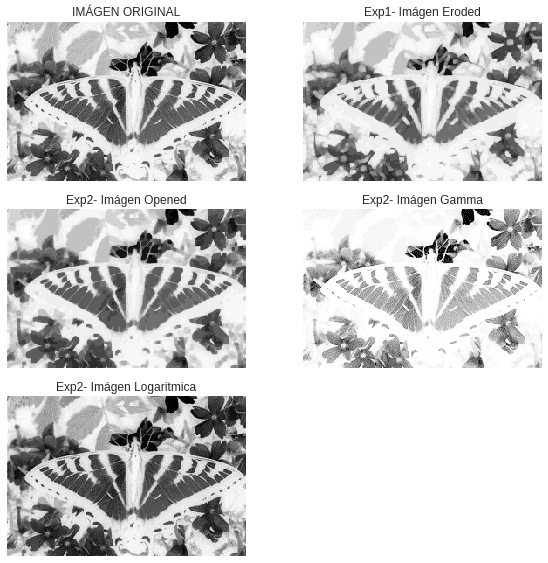

In [6]:
f2, axes2 = plt.subplots(ncols=2,nrows=3,figsize=(12, 8))
axm0, axm1, axm2, axm3, axm4, axm5 = axes2.flatten()

f2.subplots_adjust(hspace=0.6, wspace=0.1)

img_mariposa = rgb2gray(img1)

# PLOT IMAGENES
axm0.imshow(img1)
axm0.grid(False)
axm0.set_title('IMÁGEN ORIGINAL')
axm0.set_xticks([]), axm0.set_yticks([])

struct_elem = morphology.square(3)

img_eroded = morphology.erosion(img_mariposa, struct_elem)
axm1.imshow(img_eroded)
axm1.grid(False)
axm1.set_title('Exp1- Imágen Eroded')
axm1.set_xticks([]), axm1.set_yticks([])

img_opened = morphology.opening(img_mariposa, struct_elem)
axm2.imshow(img_opened)
axm2.grid(False)
axm2.set_title('Exp2- Imágen Opened')
axm2.set_xticks([]), axm2.set_yticks([])

img_gamma_corrected = exposure.adjust_gamma(img_mariposa, 3)
axm3.imshow(img_gamma_corrected)
axm3.grid(False)
axm3.set_title('Exp2- Imágen Gamma')
axm3.set_xticks([]), axm3.set_yticks([])

img_logarithmic_corrected = exposure.adjust_log(img_mariposa, 1)
axm4.imshow(img_logarithmic_corrected)
axm4.grid(False)
axm4.set_title('Exp2- Imágen Logaritmica')
axm4.set_xticks([]), axm4.set_yticks([])

#Solo para completar el gráfico
axm5.imshow(img_mariposa*0)
axm5.set_xticks([]), axm5.set_yticks([])

f2.tight_layout()
f2.subplots_adjust(left=0.15, top=0.95)
plt.show()

#Histograma de la Mariposa
En búsqueda de más información

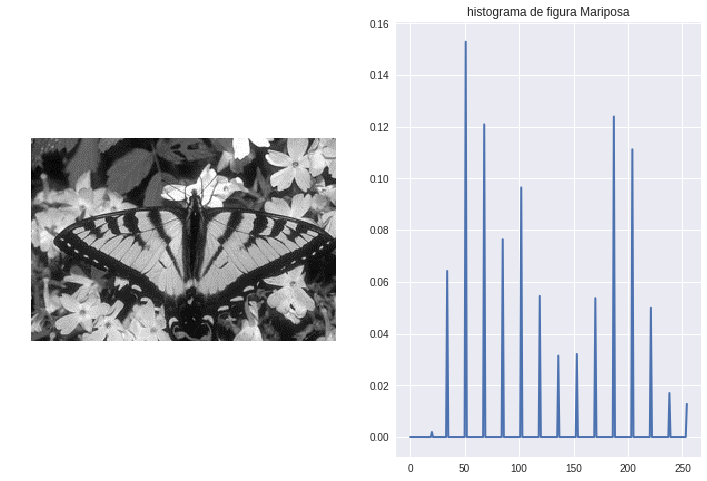

In [7]:
mariposa = img1.data
hist = np.histogram(mariposa, bins=np.arange(0, 256), normed=True)
#print(hist)
fig, axes = plt.subplots(1, 2, figsize=(12, 8))
axes[0].imshow(mariposa, cmap=plt.cm.gray, interpolation='nearest')
axes[0].axis('off')
axes[1].plot(hist[1][:-1], hist[0], lw=2)
axes[1].set_title('histograma de figura Mariposa')
plt.show()

Primer intento para identificar los contornos, utilizando el **Algoritmo de Canny.**

Observamos los contornos identificados pero vemos muchos, que no nos sirven, alrededor de nuestra mariposa, por lo cual vamos a tratar de eliminar los objetos pequeños de la imagen:

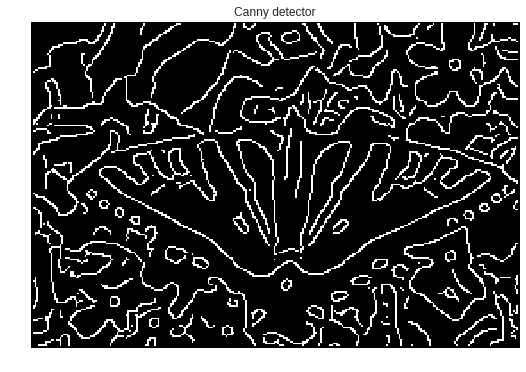

In [8]:
edges = canny(img1, sigma=2)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(edges, cmap=plt.cm.gray, interpolation='nearest')
ax.set_title('Canny detector')
ax.axis('off')
plt.show()

Vamos a tratar de eliminar los objetos pequeños de la imagen,

Los resultados no son los esperados pues se visualizan objetos que no pertenecen a la mariposa.

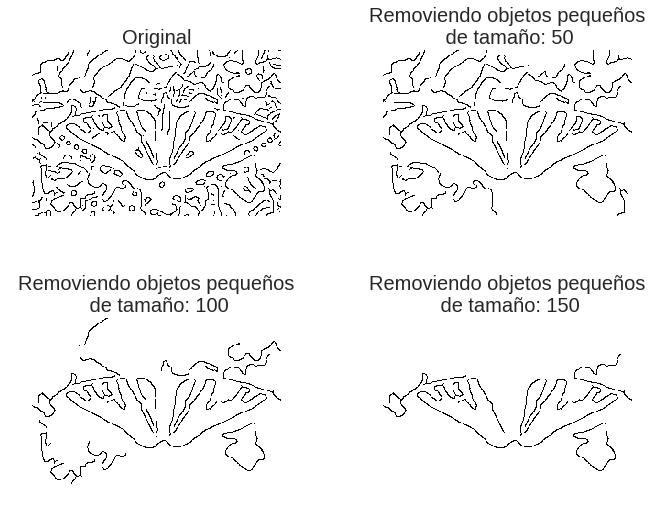

In [9]:
def plot_image(img, title):
    plt.imshow(img)
    plt.title(title, size=20)
    plt.axis('off')
    
edges[edges > 0.5] = 1 #create binary image by thresholding with fixed threshold
0.5
edges[edges <= 0.5] = 0
edges = edges.astype(np.bool)
pylab.figure(figsize=(12,8))
pylab.subplot(2,2,1), plot_image(edges, 'Original')
i = 2
for osz in [50, 100, 150]:
    im1 = morphology.remove_small_objects(edges, osz, connectivity=2)
    pylab.subplot(2,2,i), plot_image(im1, 
                                     'Removiendo objetos pequeños\n de tamaño: '
                                     + str(osz))
    i += 1
pylab.subplots_adjust(hspace=0.6, wspace=0.1)
pylab.show()

Segundo intento para identificar los contornos, utilizando el **Algoritmo de la Serpiente.**

Observamos los contornos identificados pero vemos muchos, que no nos sirven, alrededor de nuestra mariposa, por lo cual vamos a tratar de eliminar los objetos pequeños de la imagen:

In [0]:
# Imágen en negativo.
inverted_img = util.invert(img1)

In [11]:
#!pip install -q morphsnakes
"""Línea de codigo para actualizar la librería scikit-image,
    pues la del entorno no viene con todas las funciones""" 
!pip install -U scikit-image

Requirement already up-to-date: scikit-image in /usr/local/lib/python3.6/dist-packages (0.14.2)


In [0]:
from skimage.segmentation import (morphological_chan_vese, morphological_geodesic_active_contour,
                                  inverse_gaussian_gradient, checkerboard_level_set)

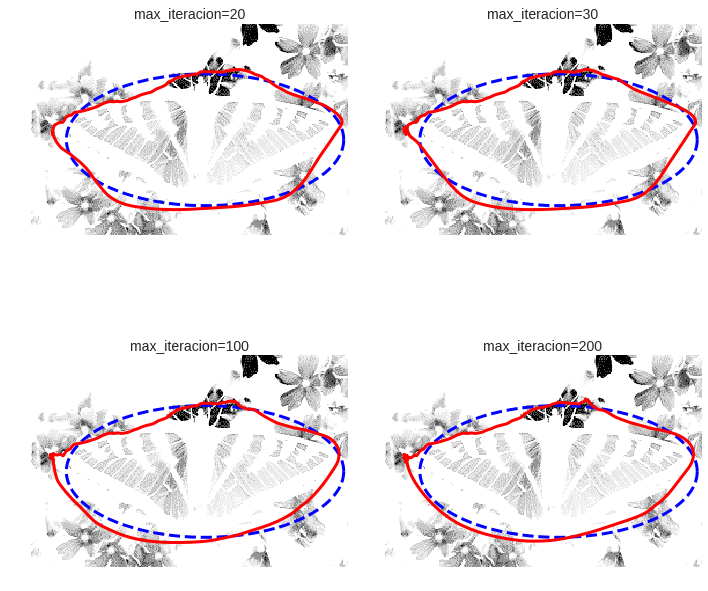

Text(0.5, 1.0, 'Contorno Adaptado')

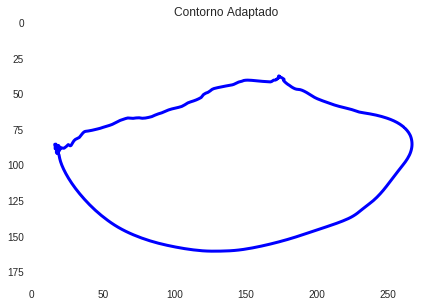

In [13]:
img = (exposure.rescale_intensity(img_gamma_corrected, in_range=(70, 255)))
img_gray = img
s = np.linspace(0, 2*np.pi, 400)
x = 150 + 120*np.cos(s)
y = 100 + 57*np.sin(s)
init = np.array([x, y]).T
i = 1
plt.figure(figsize=(10,10))
for max_it in [20, 30, 100, 200]:
    snake = active_contour(gaussian(img_gray, 3), init, alpha=0.001, beta=5, gamma=0.0001, max_iterations=max_it)
    plt.subplot(2,2,i), plt.imshow(img), plt.plot(init[:, 0], init[:,
    1], '--b', lw=3)
    plt.plot(snake[:, 0], snake[:, 1], '-r', lw=3)
    plt.axis('off'), plt.title('max_iteracion=' + str(max_it), size=14)
    i += 1
plt.tight_layout(), plt.show()

ax.set_title('Imagen resultante')
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img*0)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3)
ax.set_title('Contorno Adaptado')

Tercer intento para identificar los contornos, utilizando el **Algoritmo de la Serpiente con la imagen en negativo.**

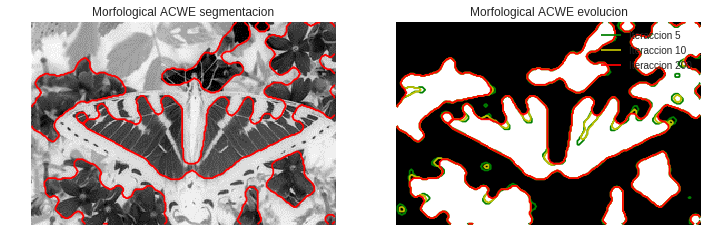

In [14]:
def store_evolution_in(lst):
    """Returns a callback function to store the evolution of the level sets in
    the given list.
    """
    def _store(x):
        lst.append(np.copy(x))     
    return _store

# Morphological ACWE
image2 = inverted_img
image_gray = inverted_img
# initial level set
init_lvl_set = checkerboard_level_set(image_gray.shape, 6)
# list with intermediate results for plotting the evolution
evolution = []
callback = store_evolution_in(evolution)
lvl_set = morphological_chan_vese(image_gray, 200, init_level_set=init_lvl_set,
                                  smoothing=3, iter_callback=callback)

fig, axes = plt.subplots(1, 2, figsize=(12, 12))
axes = axes.flatten()
axes[0].imshow(image2, cmap="gray"), axes[0].set_axis_off(),
axes[0].contour(lvl_set, [0.5], colors='r')
axes[0].set_title("Morfological ACWE segmentacion", fontsize=12)
axes[1].imshow(lvl_set, cmap="gray"), axes[1].set_axis_off()
contour = axes[1].contour(evolution[5], [0.5], colors='g')
contour.collections[0].set_label("Iteraccion 5")
contour = axes[1].contour(evolution[10], [0.5], colors='y')
contour.collections[0].set_label("Iteraccion 10")
contour = axes[1].contour(evolution[-1], [0.5], colors='r')
contour.collections[0].set_label("Iteraccion " + str(len(evolution)-1))
axes[1].legend(loc="upper right"), axes[1].set_title("Morfological ACWE evolucion",
                                                     fontsize=12)
plt.show()

Cuarto intento y final, **utilizando la técnica de contornos activos**

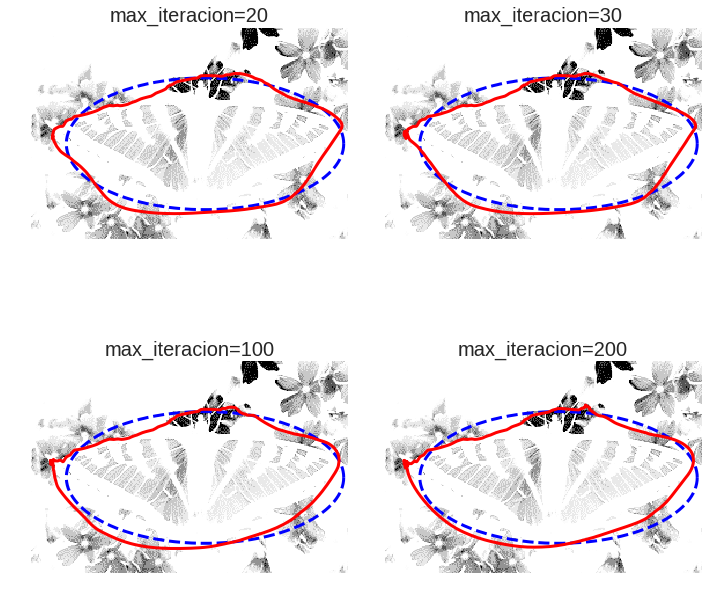

Text(0.5, 1.0, 'Contorno Adaptado')

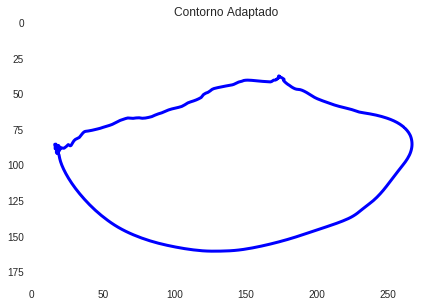

In [15]:
img = (exposure.rescale_intensity(img_gamma_corrected, in_range=(70, 255)))
img_gray = img
s = np.linspace(0, 2*np.pi, 400)
x = 150 + 120*np.cos(s)
y = 100 + 57*np.sin(s)
init = np.array([x, y]).T
i = 1
plt.figure(figsize=(10,10))
for max_it in [20, 30, 100, 200]:
    snake = active_contour(gaussian(img_gray, 3), init, alpha=0.001, beta=5, gamma=0.0001, max_iterations=max_it)
    plt.subplot(2,2,i), plt.imshow(img), plt.plot(init[:, 0], init[:,
    1], '--b', lw=3)
    plt.plot(snake[:, 0], snake[:, 1], '-r', lw=3)
    plt.axis('off'), plt.title('max_iteracion=' + str(max_it), size=20)
    i += 1
plt.tight_layout(), plt.show()

ax.set_title('Imagen resultante')
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img*0)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3)
ax.set_title('Contorno Adaptado')

# Experimentación con el Caballo

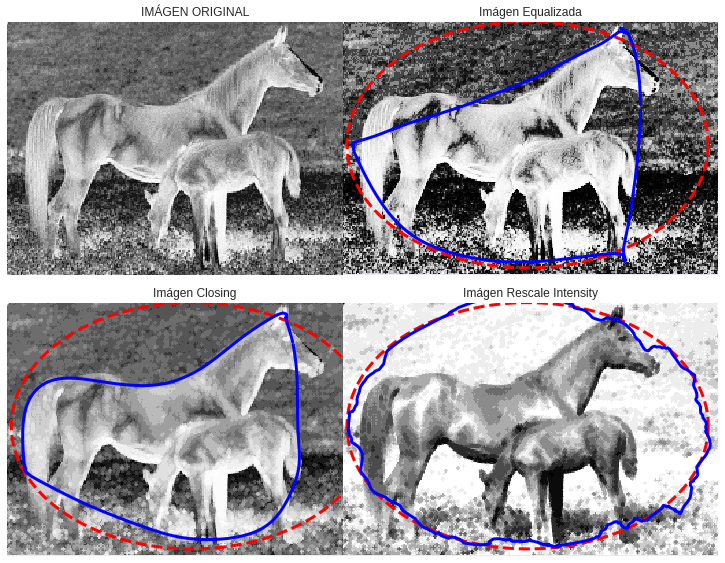

In [16]:
f3, axes3 = plt.subplots(ncols=2,nrows=2,figsize=(12, 8))
axc0, axc1, axc2, axc3 = axes3.flatten()

f3.subplots_adjust(hspace=0.6, wspace=0.1)

s = np.linspace(0, 2*np.pi, 400)
x = 135 + 132*np.cos(s)
y = 90 + 90*np.sin(s)
init = np.array([x, y]).T


# PLOT IMAGENES
axc0.imshow(img3)
axc0.grid(False)
axc0.set_title('IMÁGEN ORIGINAL')
axc0.set_xticks([]), axc0.set_yticks([])

#PLOT CABALLO HISTOGRAMA 
img_caballo = exposure.equalize_hist(img3)
snake_caballo = active_contour(gaussian(img,3),
                       init, alpha=0.00255, beta=2, gamma=0.000955)
axc1.imshow(img_caballo)
axc1.grid(False)
axc1.set_title('Imágen Equalizada')
axc1.plot(init[:, 0], init[:, 1], '--r', lw=3)
axc1.plot(snake_caballo[:, 0], snake_caballo[:, 1], '-b', lw=3)
axc1.set_xticks([]), axc1.set_yticks([])
axc1.axis([0, img_caballo.shape[1], img_caballo.shape[0], 0])

# PLOT CABALLO CLOSING
img_mor =  morphology.closing(morphology.erosion(img3))
snake_capallo_mor = active_contour(gaussian(img_mor,3),
                       init, alpha=0.00255, beta=2, gamma=0.000955)
axc2.imshow(img_mor)
axc2.grid(False)
axc2.set_title('Imágen Closing')
axc2.plot(init[:, 0], init[:, 1], '--r', lw=3)
axc2.plot(snake_capallo_mor[:, 0], snake_capallo_mor[:, 1], '-b', lw=3)
axc2.set_xticks([]), axc2.set_yticks([])
axc2.axis([0, img_mor.shape[1], img_mor.shape[0], 0])

#PLOT CABALLO RESCALE INTENSITY
img_ri = (exposure.rescale_intensity(img_mor, in_range=(20, 180)))
snake_caballo_ri = active_contour(img_ri,
                       init, alpha=0.00255, beta=2, gamma=0.000955)
axc3.imshow(img_ri,cmap='gray')
axc3.grid(False)
axc3.set_title('Imágen Rescale Intensity')
axc3.plot(init[:, 0], init[:, 1], '--r', lw=3)
axc3.plot(snake_caballo_ri[:, 0], snake_caballo_ri[:, 1], '-b', lw=3)
axc3.set_xticks([]), axc3.set_yticks([])
axc3.axis([0, img_ri.shape[1], img_ri.shape[0], 0])

f3.tight_layout()
f3.subplots_adjust(left=0.15, top=0.95)
plt.show()

**Ecualización del histograma**

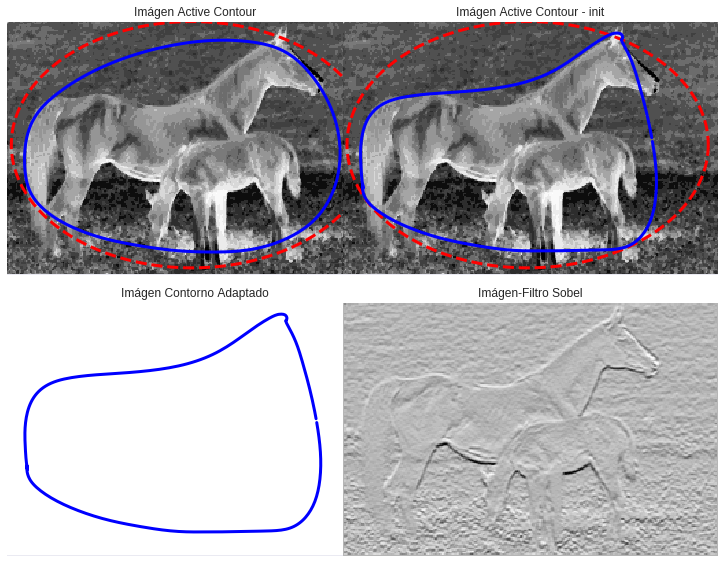

In [17]:
f4, axes4 = plt.subplots(ncols=2,nrows=2,figsize=(12, 8))
axc0, axc1, axc2, axc3 = axes4.flatten()

f4.subplots_adjust(hspace=0.6, wspace=0.1)


#PLOT CABALLO ACTIVE CONTOUR 
img = (ndi.median_filter(exposure.adjust_log(img3,gain=0.1),size=2))
snake_caballo = active_contour(gaussian(img,3),
                       init, alpha=0.00255, beta=2, gamma=0.000955)
axc0.imshow(img)
axc0.grid(False)
axc0.set_title('Imágen Active Contour')
axc0.plot(init[:, 0], init[:, 1], '--r', lw=3)
axc0.plot(snake_caballo[:, 0], snake_caballo[:, 1], '-b', lw=3)
axc0.set_xticks([]), axc0.set_yticks([])
axc0.axis([0, img.shape[1], img.shape[0], 0])

# PLOT CABALLO CLOSING
s = np.linspace(0, 2*np.pi, 400)
x = 135 + 132*np.cos(s)
y = 90 + 90*np.sin(s)
init = np.array([x, y]).T

snake_caballo = active_contour(gaussian(img3,3),
                       init, alpha=0.00255, beta=2, gamma=0.000955)
axc1.imshow(img)
axc1.grid(False)
axc1.set_title('Imágen Active Contour - init')
axc1.plot(init[:, 0], init[:, 1], '--r', lw=3)
axc1.plot(snake_caballo[:, 0], snake_caballo[:, 1], '-b', lw=3)
axc1.set_xticks([]), axc1.set_yticks([])
axc1.axis([0, img.shape[1], img.shape[0], 0])

axc2.imshow(img*0)
axc2.grid(False)
axc2.set_title('Imágen Contorno Adaptado')
axc2.plot(snake_caballo[:, 0], snake_caballo[:, 1], '-b', lw=3)
axc2.set_xticks([]), axc2.set_yticks([])
axc2.axis([0, img.shape[1], img.shape[0], 0])


im = filters.sobel_h(img3)
axc3.imshow(im)
axc3.grid(False)
axc3.set_title('Imágen-Filtro Sobel')
axc3.set_xticks([]), axc3.set_yticks([])

f4.tight_layout()
f4.subplots_adjust(left=0.15, top=0.95)
plt.show()